In [3]:
pip install imutils

  Using cached imutils-0.5.4-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [1]:
import scipy.spatial.distance as dist
import imutils.perspective as persp
import matplotlib.pyplot as plt
import numpy as np
import imutils
import cv2
import os

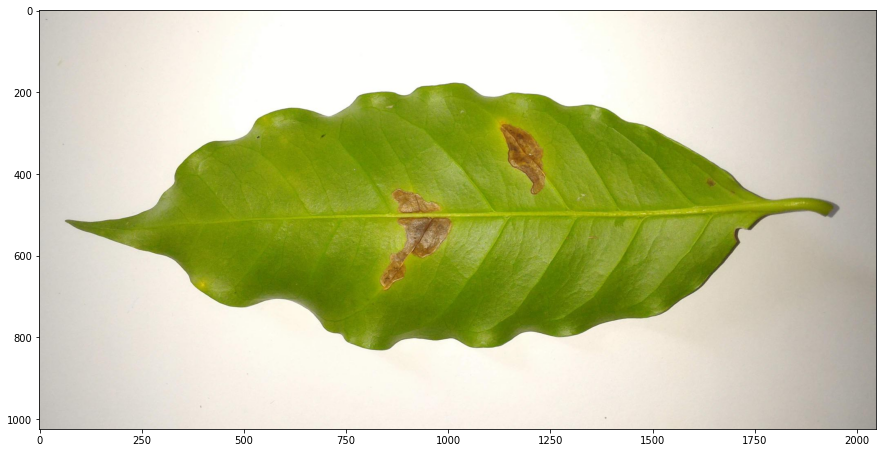

In [8]:
img = cv2.imread("/home/pam/Desktop/streamlit_tcc/Mask_RCNN-Multi-Class-Detection/Leaf/test/30.jpg")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(rgb_img)
plt.show()

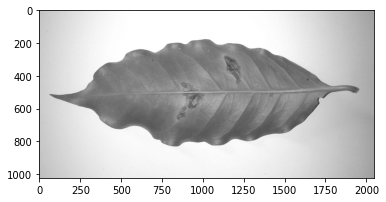

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rgb_img = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

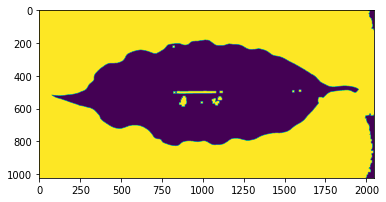

In [17]:
thresh, thresh_img = cv2.threshold(gray, 164, 255, cv2.THRESH_BINARY)
rgb_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN, kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=4)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(sure_bg,0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.imshow(unknown)

In [18]:
conts = cv2.findContours(unknown, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print("Total # of Counters by cv2: ", len(conts))

conts = imutils.grab_contours(conts)
print("Total # of imutils by cv2: ", len(conts))

Total # of Counters by cv2:  2
Total # of imutils by cv2:  12


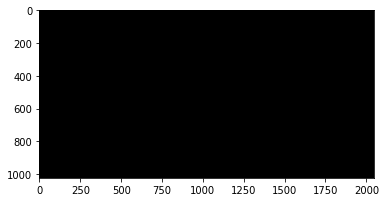

In [19]:
cont_img = np.zeros(img.shape)
plt.imshow(cont_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


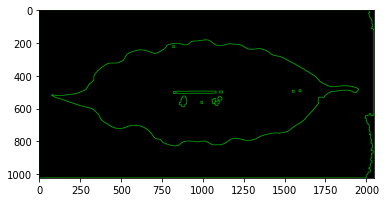

In [20]:
cont_img = cv2.drawContours(cont_img, conts, -1, (0,255,0), 2)

plt.imshow(cont_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


((1023.5, 511.5), (1023.0, 2047.0), 90.0)
((1015.5433349609375, 502.264404296875), (642.5079345703125, 1879.2423095703125), 88.58557891845703)
((995.0, 563.0), (12.0, 12.0), 90.0)
((1077.3077392578125, 558.5383911132812), (51.03241729736328, 37.164913177490234), 33.6900634765625)
((1105.5, 537.5), (23.0, 25.0), 90.0)
((884.4457397460938, 555.9718627929688), (42.29753494262695, 66.49381256103516), 27.34987449645996)
((827.5, 502.0), (12.0, 13.0), 90.0)
((1113.5, 499.0), (12.0, 19.0), 90.0)
((961.4996337890625, 500.9339294433594), (15.320451736450195, 241.083251953125), 89.63966369628906)
((1554.0, 495.0), (12.0, 12.0), 90.0)
((1595.5, 492.0), (12.0, 13.0), 90.0)
((823.0, 223.0), (12.0, 12.0), 90.0)


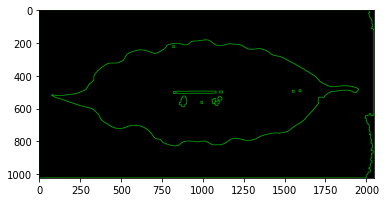

In [24]:
for c in conts:
    box = cv2.minAreaRect(c)
    print(box)
